
#### Nama: Dahni Eko Setiawan
#### NPM: 50420325
#### Kelas: 2IA15
#### Mata Kuliah: Komputasi Big Data

## 1. Mengubah library perhitungan berbasis GPU (Library Cupy)

In [1]:
# import libraries
import pandas as pd
# menggunakan cpu
# import numpy as np
# menggunakan gpu
import cupy as cp
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# read data as pandas data frame
url_data = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/data.csv"
data = pd.read_csv(url_data)
data = data.drop(['Unnamed: 32','id'],axis = 1)
## Melihat 5 baris awal dari dataset yang digunakan
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2. Korleasi compactness_mean dengan concavity_mean



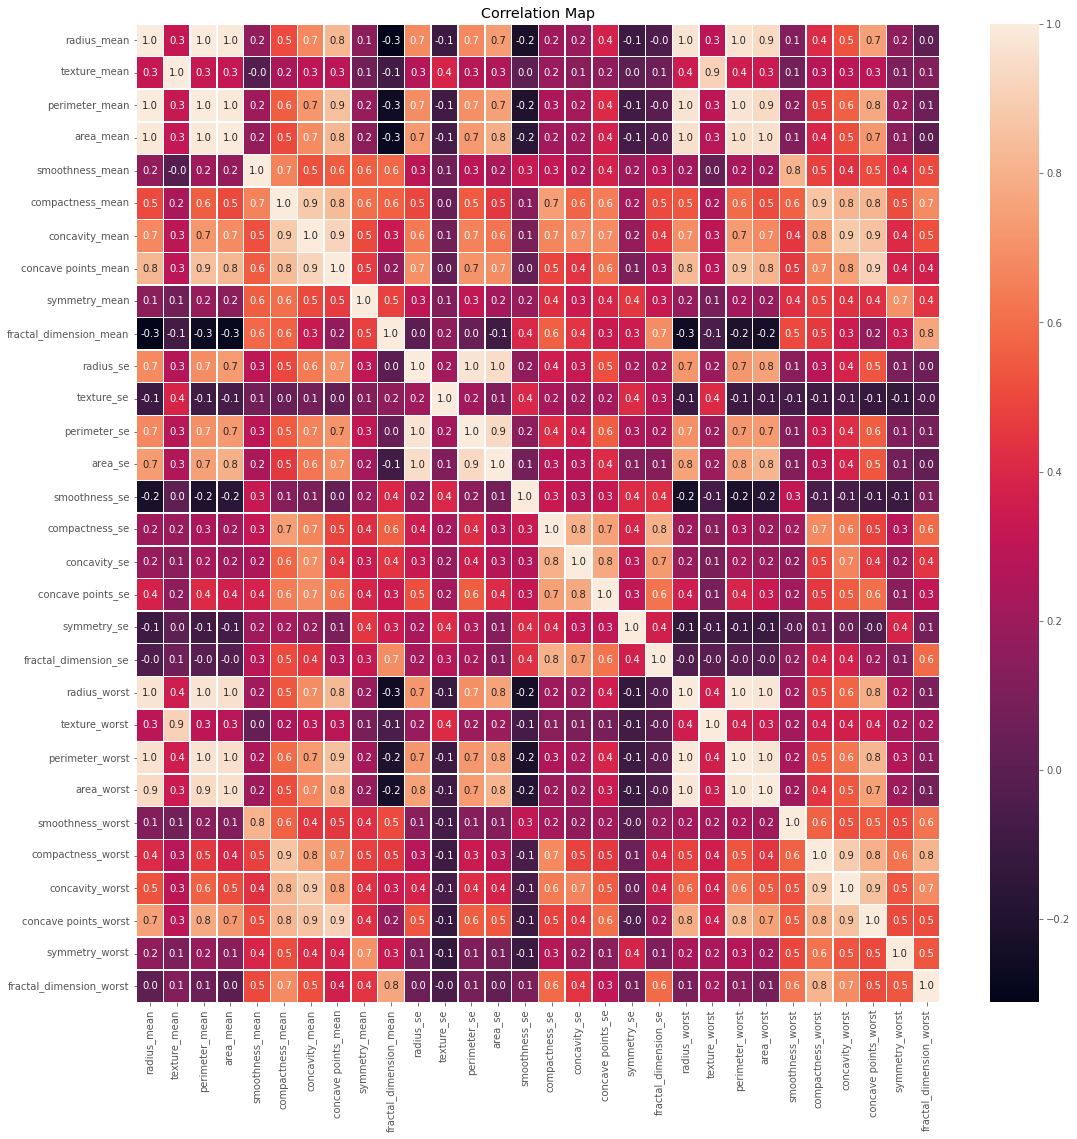

In [5]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

Berdasarkan data "Corelation Map" diatas menunjukan bahwa variable compactness_mean dengan concavity_mean mempunyai korelasi positif satu sama lain, hal ini ditujukan masing-masing variable bernilai 0.9

# 3. Diagram Korelasi compactness_mean dengan concavity_mean

<Figure size 1080x720 with 0 Axes>

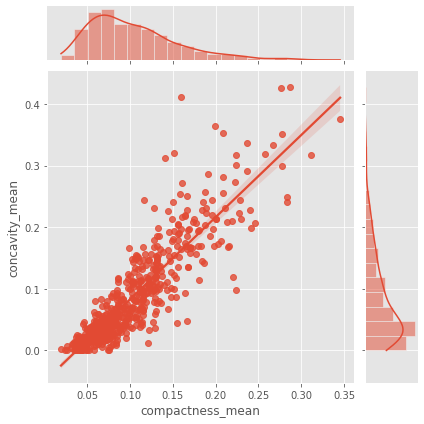

In [4]:
plt.figure(figsize = (15,10))
sns.jointplot(data.compactness_mean,data.concavity_mean,kind="reg")
plt.show()

# 4. Nilai Covariance dari compactness_mean dengan concavity_mean

In [7]:
cp.cov(data.compactness_mean,data.concavity_mean)
print("Covariance diantara compactness mean dan concavity_mean: ",data.compactness_mean.cov(data.compactness_mean))

Covariance diantara compactness mean dan concavity_mean:  0.0027891874004381287


Hasil nilai Covariance dari dua varible diatas adalah Covarians yang dimana hasil dari perhitungan kedua variable tersebut adalah nol

# 5. Nilai Pearson correlation dari compactness_meandengan concavity_mean

In [9]:
p1 = data.loc[:,["compactness_mean","concavity_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.compactness_mean)/(data.concavity_mean.std()*data.compactness_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
                  compactness_mean  concavity_mean
compactness_mean          1.000000        0.883121
concavity_mean            0.883121        1.000000
Pearson correlation:  22.37341293473819




*   korelasi pearson antara compactness_mean dan compactness_mean adalah 1 yang berarti bahwa mereka adalah distribusi yang sama
* Dan juga korelasi pearson antara compactness_mean dan concavity_mean adalah 0,88 yang berarti saling berkorelasi positif dan hubungan antara keduanya sangat tinggi



# 6. Uji Hipotesis

In [10]:
compe = data.compactness_mean
conc = data.concavity_mean

print("compactness mean value:",compe)
print("concavity mean value:",conc)

compe_std = cp.std(compe)
conc_std = cp.std(conc)

print("compactness std value:",compe_std)
print("concavity std value:", conc_std)

ttest,pval = stats.ttest_ind(compe, conc)
print("p-value",pval)

if pval < 0.05:
  print("sistem menolak null hypothesis")
else:
  print("sistem menerima null hypothesis")


compactness mean value: 0      0.27760
1      0.07864
2      0.15990
3      0.28390
4      0.13280
        ...   
564    0.11590
565    0.10340
566    0.10230
567    0.27700
568    0.04362
Name: compactness_mean, Length: 569, dtype: float64
concavity mean value: 0      0.30010
1      0.08690
2      0.19740
3      0.24140
4      0.19800
        ...   
564    0.24390
565    0.14400
566    0.09251
567    0.35140
568    0.00000
Name: concavity_mean, Length: 569, dtype: float64
compactness std value: 0.05276632912535516
concavity std value: 0.07964972534603187
p-value 0.00011189480587058287
sistem menolak null hypothesis


Saya mencoba melakukan Hypothesis test dengan membandingan rata-rata dua varible untuk menenkuan apakah ada bukti statistik bahwa rata-rata kedua variable tesebut berbeda secara signifikan.



*   hasil perbandingan kedua variable diatas adalah diabawah 0.05 sehingga sistem menolak null hypothesis
* namun apabilan hasil perbandingan kedua variable diatas diatas 0.05 maka sistem akan menerima null hypothesis

